# Python basics, webscraping and Twitter API
This is the first notebook we developed during the coding session. We covered
- retrieving and parsing HTML files
- lists, dictionaries, ranges, data types, for-loops, logical operators and list comprehensions
- storing and importing HTML files, JSON files and CSV files
- using the pandas datareader API for World Bank access
- connecting to the Twitter API and retrieving likes, retweets, created_at and tweet-ID

Requirements:
- if not preinstalled with Anaconda distribution: BeautifulSoup
- pandas-datareader via pip/sudo easy_install
- Twitter account and developer status (you have to apply for it)
- python-twitter via pip/sudo easy_install

Ressources:
- https://python-twitter.readthedocs.io/en/latest/getting_started.html

In [ ]:
# Specify your working directory. The '%' (inline magic) allows you to copy-paste directory paths directly from the explorer.

% cd C:\Users\wolfg\Desktop\Europe Code Week

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
import os

In [ ]:
seed = 'https://www.hu-berlin.de/'

In [10]:
type(seed)

str

In [ ]:
# Retrieve the page source code as HTML from the 'seed' URL

html = requests.get(seed)

In [21]:
print(html.request.headers)

{'User-Agent': 'python-requests/2.5.0 CPython/3.6.6 Windows/10', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Cookie': 'I18N_LANGUAGE="de"'}


In [20]:
print(html.status_code)

200


In [ ]:
type(html.text)

In [26]:
len(html.text)

49629

In [25]:
html.text[0:2000]

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"><html xmlns="http://www.w3.org/1999/xhtml" lang="de" xml:lang="de">\n  <head>\n    \n    \n    \n    \n    \n    \n    \n    \n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><meta http-equiv="X-UA-Compatible" content="IE=edge" /><base href="https://www.hu-berlin.de/de/" /><meta content="text/plain" name="DC.format" /><meta content="Ordner" name="DC.type" /><meta content="2015/05/20 - " name="DC.date.valid_range" /><meta content="Katrin Lanyi" name="DC.creator" /><meta content="2015-05-20T11:47:35+02:00" name="DC.date.created" /><meta content="2019-06-18T10:31:12+02:00" name="DC.date.modified" /><meta content="de" name="DC.language" /><script async="" src="https://www.hu-berlin.de/++resource++collective.lazysizes/lazysizes-19a41de.js"></script><link rel="stylesheet" type="text/css" href="https://www.hu-berlin.de/portal_css/humboldt/base-cachek

The cell below saves the retrieved HTML code as .html file in your directory.

In [ ]:
with open('HU_Berlin.html', 'w', encoding='utf-8') as f:
    
    f.write(html.text)

BeautifulSoup restructures the raw HTML code into a more handy format that allows us to parse for specific elements.

In [ ]:
soup = BeautifulSoup(html.text, "html5lib")

In [30]:
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="de" xml:lang="de" xmlns="http://www.w3.org/1999/xhtml"><head>
    
    
    
    
    
    
    
    
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><base href="https://www.hu-berlin.de/de/"/><meta content="text/plain" name="DC.format"/><meta content="Ordner" name="DC.type"/><meta content="2015/05/20 - " name="DC.date.valid_range"/><meta content="Katrin Lanyi" name="DC.creator"/><meta content="2015-05-20T11:47:35+02:00" name="DC.date.created"/><meta content="2019-06-18T10:31:12+02:00" name="DC.date.modified"/><meta content="de" name="DC.language"/><script async="" src="https://www.hu-berlin.de/++resource++collective.lazysizes/lazysizes-19a41de.js"></script><link href="https://www.hu-berlin.de/portal_css/humboldt/base-cachekey-a6e9ac4618a6b81117e6b9abebaf96c0.css" rel="stylesheet

Below we search for all elements that are identified by the 'a' selector.

In [ ]:
links = soup.find_all('a')

In [36]:
links[0].get('href')

'https://www.hu-berlin.de/de#content'

In [38]:
links[0].text

'Direkt zum Inhalt'

## Python basics intermezzo

In [ ]:
my_number_list = [1,2,3]

In [42]:
my_number_list[2]

3

In [ ]:
my_word_list = ['A', 'B', 'C']

You can concatenate lists containing different data types.

In [45]:
my_number_list + my_word_list

[1, 2, 3, 'A', 'B', 'C']

In [ ]:
my_new_numbers = [4,5,6]

In [48]:
from operator import add

number_list = list(map(add, my_number_list, my_new_numbers))
print(number_list)

[5, 7, 9]


In [ ]:
automated_range = range(0, 10)

for number in automated_range:
    
    print(number)

Mini-task: Iterate over the automated_range and sort even numbers into a list 'even_numbers' and odd numbers into a list 'odd_numbers'.

Hint: to check whether a number is even use 'number % 2 == 0'

In [ ]:
even_numbers = []
odd_numbers =  []

for number in automated_range:
    
    if (number % 2) == 0:
        
        even_numbers.append(number)
        
    else:
        
        odd_numbers.append(number)

In [53]:
even_numbers

[0, 2, 4, 6, 8]

In [55]:
odd_numbers

[1, 3, 5, 7, 9]

You can achieve the same results by just two lines of code (list comprehensions).

In [57]:
even_numbers_lc = [x for x in range(10) if x % 2 == 0]
odd_numbers_lc = [x for x in range(10) if not x % 2 == 0]

In [60]:
even_numbers_lc == even_numbers

True

In [ ]:
odd_numbers_lc == odd_numbers

## Back to the Humboldt-University project
The cell below sorts elements' hyperlink attribute into one list and the displayed text element into another list.

In [ ]:
link_list = []
title_list = []

for link_num in range(len(links)):
    
    sub_link = links[link_num].get('href')
    sub_title = links[link_num].text
    
    if type(sub_link) is str and 'www' in sub_link:
        
        link_list.append(sub_link)
        title_list.append(sub_title)

In [66]:
link_list[:10]

['https://www.hu-berlin.de/de#content',
 'https://www.hu-berlin.de/de#search',
 'https://www.hu-berlin.de/de#portletNavigationTree',
 'https://www.hu-berlin.de/de/interessierte',
 'https://www.hu-berlin.de/de/schule',
 'https://www.hu-berlin.de/de/forschende',
 'https://www.hu-berlin.de/de/promovierende',
 'https://www.hu-berlin.de/de/postdoktoranden',
 'https://www.hu-berlin.de/de/forschende/tenuretrack',
 'https://www.hu-berlin.de/de/wirtschaft']

In [68]:
title_list[:10]

['Direkt zum Inhalt',
 'Direkt zur Suche',
 'Direkt zur Navigation',
 'Studieninteressierte',
 'Schule',
 'Forschende',
 'Promovierende',
 'Postdoktoranden/innen',
 'Tenure-Track-Professor/innen',
 'Wirtschaft']

First we combine the two lists to a tuple and then put it in a list.

In [ ]:
lot = list(zip(title_list, link_list))

Next we convert the list to a dictionary. Remember, a dictionary always has a keys attribute and a values attribute. You can inspect it by the .keys() and .values() functions, respectively.

In [ ]:
D = dict(lot)

In [ ]:
# This is a comment!

In [ ]:
import json

Below we're writing the dictionary 'D' to a .json file, a very common file format in web development and APIs.

In [ ]:
with open('HU_dict.json', 'w', encoding='utf-8') as f:
    
    json.dump(D, f, ensure_ascii=False)

In [ ]:
with open('HU_dict.json', 'r', encoding='utf-8') as f:
    
    D_read = json.load(f)

In [ ]:
D == D_read

## Pandas Datareader API and World Bank

In [ ]:
from pandas_datareader import wb # importiert world bank Zugang
wb.search('gdp.*capita.*const')

In [ ]:
df = wb.download(indicator='NY.GDP.PCAP.PP.KD', country=['US', 'DE', 'FR', 'GB'], start=2000, end=2018)

In [ ]:
df.to_csv("Worldbank_Data.csv")

In [ ]:
imported_df = pd.read_csv("Worldbank_Data.csv")

In [96]:
df.groupby('country').describe()

NY.GDP.PCAP.PP.KD                                           \
                           count          mean          std           min   
country                                                                     
France                      19.0  36970.475506  1295.101106  34705.141046   
Germany                     19.0  40815.777548  3142.823493  36764.562927   
United Kingdom              19.0  37177.750977  1925.883998  33151.677911   
United States               19.0  50140.409786  2892.933378  45661.268667   

                                                                        
                         25%           50%           75%           max  
country                                                                 
France          36170.202058  37376.535433  37623.169828  39555.544663  
Germany         37561.012720  40473.527450  43290.620629  45959.361896  
United Kingdom  36231.313456  37172.025436  38460.430336  40157.982229  
United States   48459.768607  50349.715321  51644.842498  55681.044577

In [105]:
wide = df.unstack()

In [116]:
wide.head()

NY.GDP.PCAP.PP.KD                                            \
year                        2000          2001          2002          2003   
country                                                                      
France              34705.141046  35136.939669  35278.439609  35317.624690   
Germany             36764.562927  37325.052547  37262.351288  36977.346008   
United Kingdom      33151.677911  33962.417239  34664.326938  35655.513076   
United States       45661.268667  45662.934837  46029.198996  46941.003290   

                                                                        \
year                    2004          2005          2006          2007   
country                                                                  
France          36050.601091  36374.971021  37006.994868  37670.527838   
Germany         37418.092500  37703.932940  39143.166244  40473.527450   
United Kingdom  36285.597579  37172.025436  37840.030386  38502.274226   
United States   48275.386104  49512.926789  50437.806235  50897.731238   

                                                                        \
year                    2008          2009          2010          2011   
country                                                                  
France          37556.095877  36289.803026  36814.921142  37440.638630   
Germany         40989.443115  38784.452482  40428.721031  42692.519757   
United Kingdom  38068.317666  36177.029334  36508.780174  36820.321718   
United States   50349.715321  48644.151110  49479.248679  49883.113984   

                                                                        \
year                    2012          2013          2014          2015   
country                                                                  
France          37376.535433  37398.926120  37575.811818  37835.807077   
Germany         42822.099404  42914.476113  43666.765146  44043.177935   
United Kingdom  37094.312626  37600.799281  38418.586445  39009.734894   
United States   50632.443448  51208.892428  52080.792568  53187.573374   

                                                          
year                    2016          2017          2018  
country                                                   
France          38097.877038  38955.833966  39555.544663  
Germany         44668.696298  45462.028331  45959.361896  
United Kingdom  39425.195883  39862.345525  40157.982229  
United States   53631.757624  54470.796669  55681.044577

In [ ]:
dft = wide.transpose()

In [115]:
wide.transpose()

country                       France       Germany  United Kingdom  \
                  year                                               
NY.GDP.PCAP.PP.KD 2000  34705.141046  36764.562927    33151.677911   
                  2001  35136.939669  37325.052547    33962.417239   
                  2002  35278.439609  37262.351288    34664.326938   
                  2003  35317.624690  36977.346008    35655.513076   
                  2004  36050.601091  37418.092500    36285.597579   
                  2005  36374.971021  37703.932940    37172.025436   
                  2006  37006.994868  39143.166244    37840.030386   
                  2007  37670.527838  40473.527450    38502.274226   
                  2008  37556.095877  40989.443115    38068.317666   
                  2009  36289.803026  38784.452482    36177.029334   
                  2010  36814.921142  40428.721031    36508.780174   
                  2011  37440.638630  42692.519757    36820.321718   
                  2012  37376.535433  42822.099404    37094.312626   
                  2013  37398.926120  42914.476113    37600.799281   
                  2014  37575.811818  43666.765146    38418.586445   
                  2015  37835.807077  44043.177935    39009.734894   
                  2016  38097.877038  44668.696298    39425.195883   
                  2017  38955.833966  45462.028331    39862.345525   
                  2018  39555.544663  45959.361896    40157.982229   

country                 United States  
                  year                 
NY.GDP.PCAP.PP.KD 2000   45661.268667  
                  2001   45662.934837  
                  2002   46029.198996  
                  2003   46941.003290  
                  2004   48275.386104  
                  2005   49512.926789  
                  2006   50437.806235  
                  2007   50897.731238  
                  2008   50349.715321  
                  2009   48644.151110  
                  2010   49479.248679  
                  2011   49883.113984  
                  2012   50632.443448  
                  2013   51208.892428  
                  2014   52080.792568  
                  2015   53187.573374  
                  2016   53631.757624  
                  2017   54470.796669  
                  2018   55681.044577

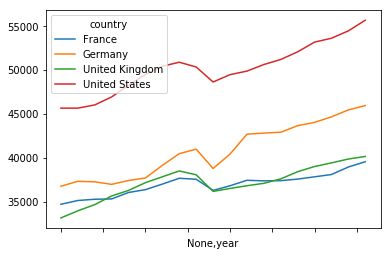

In [212]:
% matplotlib inline
dft.plot()

As we can see from this rough plot the US has the highest GDP per capita.

## Twitter API
In order to connect to the Twitter API you need developer status and a .txt file containg your credentials. You have to create an app on the Twitter developer page and note a consumer key, consumer secret, access token key and access token secret. Copy them line by line into the .txt file (I named mine 'Twitter_API.txt'). You also need to have installed the python-twitter library.

In [214]:
with open('Twitter_API.txt', 'r') as f:
    keys = f.read().split()

In [215]:
import twitter

In [216]:
api = twitter.Api(consumer_key=keys[0],
                 consumer_secret = keys[1],
                 access_token_key = keys[2],
                 access_token_secret = keys[3])

In [217]:
statuses = api.GetUserTimeline('108566175', count=200)

In [218]:
first_tweet = statuses[0].AsDict()

In [219]:
len(statuses)

200

Below I'm iterating over the statuses object which is a list and contains the most recent 200 tweets from the Twitter-ID '108566175' which is the Twitter account of Humboldt-University of Berlin. I'm converting every iterated element 'tweet' to a dictionary, extract the 'id', 'created_at' and 'text' properties and have to take account for a kind of inconsistency I experienced when I wanted to access the 'favorite_count' (= likes) property. Finally I append all sub dictionaries to a list and combine the individual rows a single dataframe.

In [220]:
empty_list = []

for idx, tweet in enumerate(statuses):
    
    as_dict = tweet.AsDict()
    
    empty_dict = {}
    
    empty_dict['tweet_id'] = as_dict['id']
    empty_dict['tweet_date'] = as_dict['created_at']
    empty_dict['tweet_text'] = as_dict['text']
#    empty_dict['likes'] = as_dict['favorite_count']
    
    if 'favorite_count' in as_dict.keys():
        
        empty_dict['likes'] = as_dict['favorite_count']
        
    elif 'retweeted_status' in as_dict.keys():
        
        if 'favorite_count' in as_dict['retweeted_status']:
            
            empty_dict['likes'] = as_dict['retweeted_status']['favorite_count']
        
    empty_list.append(empty_dict)

In [221]:
df = pd.DataFrame(empty_list)

In [222]:
df.head()

likes                      tweet_date             tweet_id  \
0    NaN  Thu Oct 10 09:23:09 +0000 2019  1182225042349973504   
1   20.0  Tue Oct 08 14:28:12 +0000 2019  1181577035933782016   
2   12.0  Tue Oct 08 13:55:24 +0000 2019  1181568781765742592   
3    4.0  Mon Oct 07 09:21:35 +0000 2019  1181137486292148225   
4    2.0  Wed Oct 02 11:35:47 +0000 2019  1179359316576481282   

                                          tweet_text  
0  @philhellene0217 Hallo @philhellene0217, die K...  
1  Start des Wintersemesters 2019/20: Die #humbol...  
2  RT @TspWissenschaft: Begrüßung der ersten Stud...  
3  RT @HumboldtCompass: Unsere erste Runde "Wie b...  
4  RT @IRI_THESys: Haben wir jetzt den Durchbruch...

Below I convert the 'tweet_date' column which contains still string elements to actual datetime elements and set it as the table's index column.

In [198]:
df['tweet_date'] = pd.to_datetime(df['tweet_date'])

In [199]:
df.set_index(keys = 'tweet_date', inplace = True)

With a datetime column it is possible now to use the resample function which aggregates all likes on a daily basis by summing them up.

In [200]:
daily_likes = list(df['likes'].resample('D').sum())

In [204]:
dates = df['likes'].resample('D').sum().index

In [206]:
likes_df = pd.DataFrame(data = {'Likes': daily_likes})
likes_df.set_index(pd.DatetimeIndex(dates), inplace = True, drop = True)

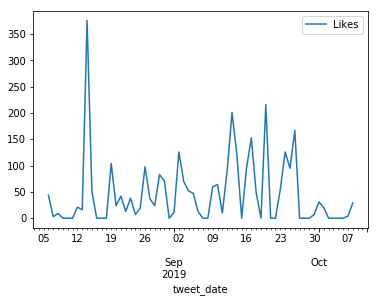

In [208]:
likes_df.plot()

It seems there was one very popular tweet in August 2019 but the social media team of HU Berlin could certainly improve in terms of reach ;-)

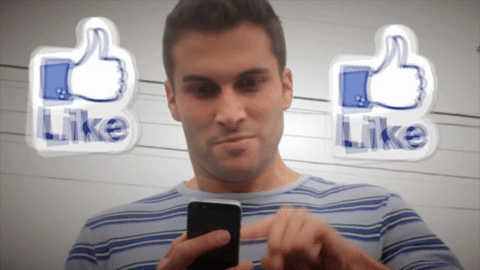

In [223]:
from IPython.display import Image
Image("https://media.giphy.com/media/14cilFdQzr8hG0/source.gif")

In [163]:
empty_list[0].keys()

dict_keys(['created_at', 'favorite_count', 'hashtags', 'id', 'id_str', 'lang', 'retweet_count', 'source', 'text', 'truncated', 'urls', 'user', 'user_mentions'])

In [144]:
type(first_tweet)

dict

In [145]:
first_tweet.keys()

dict_keys(['created_at', 'favorite_count', 'hashtags', 'id', 'id_str', 'lang', 'retweet_count', 'source', 'text', 'truncated', 'urls', 'user', 'user_mentions'])

In [146]:
first_tweet.values()

dict_values(['Tue Oct 08 14:28:12 +0000 2019', 18, [{'text': 'humboldtuni'}], 1181577035933782016, '1181577035933782016', 'de', 3, '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'Start des Wintersemesters 2019/20: Die #humboldtuni begrüßt über 8000 Erstsemester. Insgesamt sind über 36.000 Stud… https://t.co/P25vJLCT27', True, [{'expanded_url': 'https://twitter.com/i/web/status/1181577035933782016', 'url': 'https://t.co/P25vJLCT27'}], {'created_at': 'Tue Jan 26 10:08:26 +0000 2010', 'description': 'Offizieller Twitter-Account der Humboldt-Universität zu Berlin. Tweets des Online-Teams der HU #humboldtuni Impressum: https://t.co/ZfduTNZZqf', 'favourites_count': 3540, 'followers_count': 20898, 'friends_count': 220, 'geo_enabled': True, 'id': 108566175, 'id_str': '108566175', 'listed_count': 441, 'location': 'Berlin, Germany', 'name': 'Humboldt-Universität zu Berlin', 'profile_background_color': 'B2C1D1', 'profile_background_image_url': 'http://abs.twimg.com/ima

In [131]:
print([s.text for s in statuses])

['Start des Wintersemesters 2019/20: Die #humboldtuni begrüßt über 8000 Erstsemester. Insgesamt sind über 36.000 Stud… https://t.co/P25vJLCT27', 'RT @TspWissenschaft: Begrüßung der ersten Studierenden der Islamischen Theologie an der @HumboldtUni. Die Erstis sind neugierig und gespann…', 'RT @HumboldtCompass: Unsere erste Runde "Wie beginne ich mein Studium?" läuft schon und ist gut besucht. Verschlafen? Kein Problem, um 13 U…', 'RT @IRI_THESys: Haben wir jetzt den Durchbruch? Das fragt Brigitte Knopf vom @MCC_Berlin am 09. Oktober bei ihrer #climatelecture an der @H…', 'RT @AvHStiftung: To Whom Does Culture Belong? Public panel discussion with #AvHProfessor Sharon Macdonald, cultural anthropologist @Humbold…', "RT @tomaso_duso: A very warm welcome to the first official cohort of #BSE doctoral students! It's wonderful to have you in Berlin! @DIW_Ber…", 'RT @UniOldenburg: Is #resilience a measurable property or a social construct? Steffen Hamborg @UniOldenburg, Jasper N. Meya @idiv, Kla